In [4]:
import sys
from pathlib import Path

ROOT_DIR = Path().resolve().parent
sys.path.append(str(ROOT_DIR))

import pandas as pd
import matplotlib.pyplot as plt

from src.data_io import load_raw_csv

df = load_raw_csv("covertype.csv")

print("Shape:", df.shape)
df.head()


Shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Quick checks
print(df.info())

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values (top):")
print(missing.head(10))

# Duplicates
dupes = df.duplicated().sum()
print("Duplicate rows:", dupes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Target unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
class
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


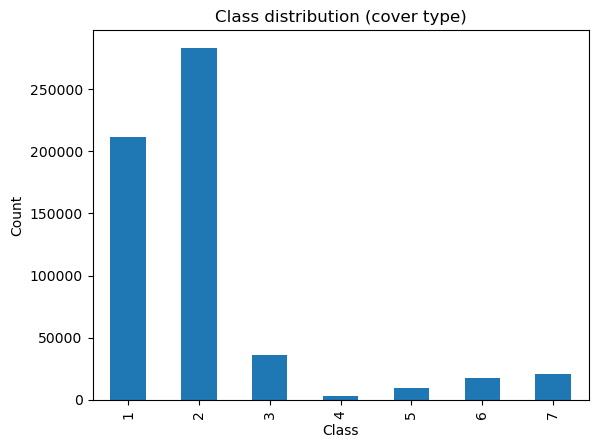

In [6]:
#target variable
target_col = "class"

print("Target unique values:", sorted(df[target_col].unique()))
print(df[target_col].value_counts().sort_index())

# Plot class distribution
df[target_col].value_counts().sort_index().plot(kind="bar")
plt.title("Class distribution (cover type)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
# Check one-hot encoded columns
soil_cols = [c for c in df.columns if c.startswith("Soil_Type")]
wild_cols = [c for c in df.columns if c.startswith("Wilderness_Area")]

print("Soil cols:", len(soil_cols))
print("Wilderness cols:", len(wild_cols))

# Should be 0/1 only
print("Soil unique values:", pd.unique(df[soil_cols].values.ravel())[:10])
print("Wild unique values:", pd.unique(df[wild_cols].values.ravel())[:10])

# Check that each row has only one soil type and one wilderness area
soil_sum = df[soil_cols].sum(axis=1)
wild_sum = df[wild_cols].sum(axis=1)

print("Soil one-hot row sums (value counts):")
print(soil_sum.value_counts().head(10))

print("Wilderness one-hot row sums (value counts):")
print(wild_sum.value_counts().head(10))


Soil cols: 40
Wilderness cols: 4
Soil unique values: [0 1]
Wild unique values: [1 0]
Soil one-hot row sums (value counts):
1    581012
Name: count, dtype: int64
Wilderness one-hot row sums (value counts):
1    581012
Name: count, dtype: int64


In [8]:
# Describe numeric columns (ignore one-hot and target)
num_cols = [c for c in df.columns if c not in soil_cols + wild_cols + [target_col]]

df[num_cols].describe().T[["mean", "std", "min", "max"]].head(20)

,mean,std,min,max
Elevation,2959.365301,279.984734,1859.0,3858.0
Aspect,155.656807,111.913721,0.0,360.0
Slope,14.103704,7.488242,0.0,66.0
Horizontal_Distance_To_Hydrology,269.428217,212.549356,0.0,1397.0
Vertical_Distance_To_Hydrology,46.418855,58.295232,-173.0,601.0
Horizontal_Distance_To_Roadways,2350.146611,1559.254870,0.0,7117.0
Hillshade_9am,212.146049,26.769889,0.0,254.0
Hillshade_Noon,223.318716,19.768697,0.0,254.0
Hillshade_3pm,142.528263,38.274529,0.0,254.0
Horizontal_Distance_To_Fire_Points,1980.291226,1324.195210,0.0,7173.0
